Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
transactions.isnull().mean()

date              0.0
date_block_num    0.0
shop_id           0.0
item_id           0.0
item_price        0.0
item_cnt_day      0.0
dtype: float64

In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
len(items), items.item_id.nunique(),items.item_category_id.nunique() 

(22170, 22170, 84)

In [10]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [11]:
len(shops), shops.shop_id.nunique() 

(60, 60)

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [12]:
transactions.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

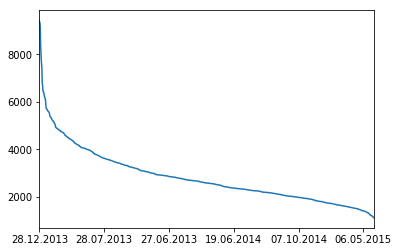

In [13]:
transactions.date.value_counts().plot()

In [14]:
transactions.date = pd.to_datetime(transactions.date, format='%d.%m.%Y')
transactions['month'] = transactions.date.dt.month
transactions['year'] = transactions.date.dt.year

In [15]:
df_sep = transactions[(transactions.month == 9) & (transactions.year == 2014)]

tasks demands: *Sometimes items are returned, find such examples in the dataset.*

We also know that: item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

In [16]:
#df_sep = df_sep[df_sep.item_cnt_day != -1]

In [17]:
df_sep['revenue'] = (df_sep.item_cnt_day * df_sep.item_price).values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
max_revenue = df_sep.groupby('shop_id')['revenue'].sum().max()
max_revenue

7982852.1999999564

In [19]:
# YOUR CODE GOES HERE

max_revenue = max_revenue
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [20]:
df_summer = transactions[(transactions.month.isin([6,7,8])) & (transactions.year == 2014)]
df_summer = df_summer[df_summer.item_cnt_day != -1]

In [21]:
df_summer.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
1705909,2014-06-15,17,26,9532,399.00,1.0,6,2014
1705910,2014-06-10,17,26,9507,149.00,1.0,6,2014
1705911,2014-06-13,17,26,9509,246.32,1.0,6,2014
1705912,2014-06-03,17,26,9532,399.00,1.0,6,2014
1705913,2014-06-08,17,26,9532,399.00,1.0,6,2014


In [22]:
df_summer['revenue'] = (df_summer.item_cnt_day * df_summer.item_price).values

Merge to get item category

In [23]:
df_summer = df_summer.merge(items,on='item_id', how='left')

In [24]:
df_max = df_summer.groupby('item_category_id')['revenue'].sum()

Get the exact value

In [25]:
result = df_max.sort_values(ascending=False).index
result_second_task = result[0]
result_second_task

20

In [26]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = result # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', result_second_task)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [27]:
transactions['bought'] = 1

What did worked

In [28]:
grps = transactions.groupby(['item_id'])['item_price'].apply(set)
filtered = grps[grps.map(len) > 1].index

In [29]:
len(filtered)

15881

In [30]:
transactions.item_id.nunique() - len(filtered)

5926

In [31]:
# YOUR CODE GOES HERE

num_items_constant_price = transactions.item_id.nunique() - len(filtered)# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [32]:
df_dec = transactions[(transactions.month == 12) & (transactions.year == 2014)]
#df_dec = df_dec[df_dec.item_cnt_day != -1]
df_dec = df_dec[df_dec.shop_id == 25]

In [33]:
df_dec_sum = df_dec.groupby('date')['item_cnt_day'].sum()
#df_dec_sum

In [34]:
df_dec_sum.var()

117167.70229885059

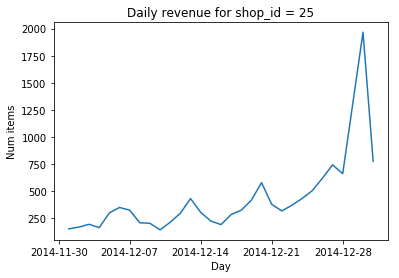

Current answer for task total_num_items_sold_var is: 117167.702299


In [35]:
shop_id = 25

total_num_items_sold = df_dec_sum.values
days = df_dec_sum.index # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = df_dec_sum.var(ddof=1) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [36]:
STUDENT_EMAIL = ''
STUDENT_TOKEN = ''
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [37]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

TypeError: argument of type 'NoneType' is not iterable

Well done! :)